In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Online_Retail.xlsx',skiprows=0,header=0)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df['Amount'] = df.Quantity * df.UnitPrice

In [4]:
df_customer_by_amount = df.groupby(by=['CustomerID'])\
                          .Amount \
                          .sum() \
                          .reset_index() \
                          .sort_values(by=['Amount'], ascending=False)

print('df_customer_by_amount')
print(df_customer_by_amount.head())


df_customer_by_amount
      CustomerID     Amount
1703     14646.0  279489.02
4233     18102.0  256438.49
3758     17450.0  187482.17
1895     14911.0  132572.62
55       12415.0  123725.45


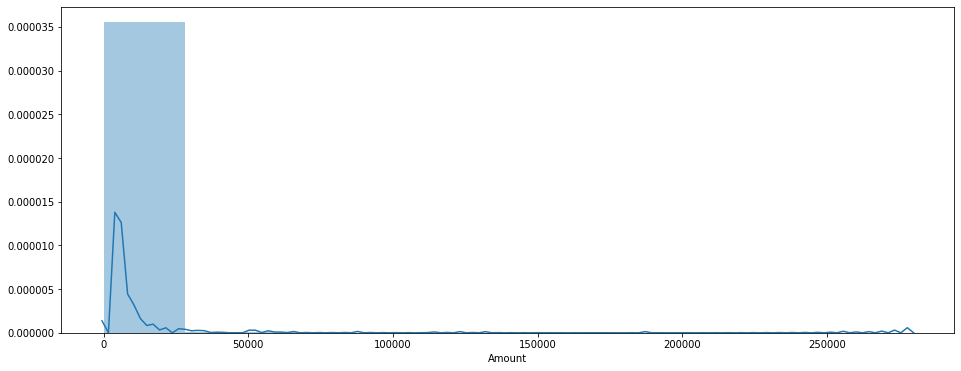

In [5]:
plt.figure(figsize=(16, 6))

sns.distplot(df_customer_by_amount['Amount'].loc[df_customer_by_amount['Amount']>0],bins=10)

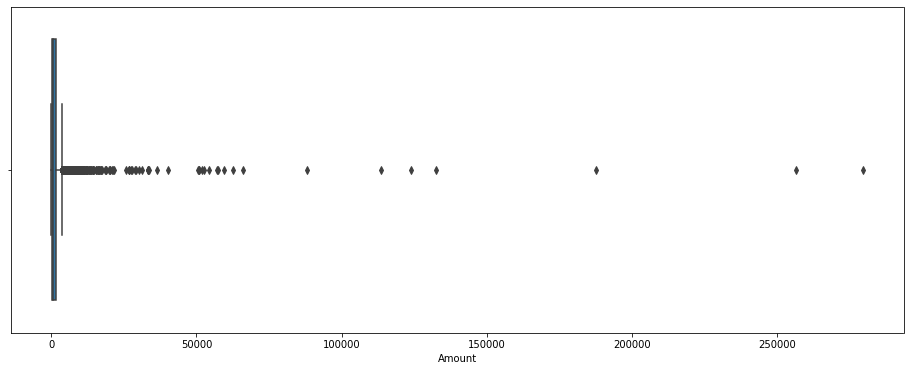

In [6]:
plt.figure(figsize=(16, 6))

sns.boxplot(df_customer_by_amount['Amount'].loc[df_customer_by_amount['Amount']>0])

In [7]:
Total_amount_wo_neg_values=np.sum(df_customer_by_amount['Amount'].where(df_customer_by_amount['Amount']>0))

In [8]:
Total_amount_wo_neg_values

8313294.954

In [9]:
Total_customers_wo_neg_values=len(df_customer_by_amount[df_customer_by_amount['Amount']>0])
Total_customers_wo_neg_values

4322

The total amount purachsed in the time period in the data is 8313294.954 (w/o considering the negative amounts in the dataframe, after grouping them by CustomerID. 

The total number of customers satisfying the net positive amount criterion is 4322.

In [10]:
df_customer_by_amount['Amount'].loc[df_customer_by_amount['Amount']>0].describe()

count    4.322000e+03
mean     1.923483e+03
std      8.263128e+03
min      1.243450e-14
25%      3.022925e+02
50%      6.575500e+02
75%      1.625740e+03
max      2.794890e+05
Name: Amount, dtype: float64

In [11]:
Total_amount_wo_neg_values_Above_Upper_Quartile=np.sum(df_customer_by_amount['Amount'].where(df_customer_by_amount['Amount']>1.625740e+03))
Total_amount_wo_neg_values_Above_Upper_Quartile

6500571.271

In [14]:
Percentage_share_of_amount_Above_Upper_Quartile=Total_amount_wo_neg_values_Above_Upper_Quartile*100/Total_amount_wo_neg_values
Percentage_share_of_amount_Above_Upper_Quartile

78.19488309953691

In [15]:
Customers_wo_neg_values_Above_Upper_Quartile=len(df_customer_by_amount[df_customer_by_amount['Amount']>1.625740e+03])
Customers_wo_neg_values_Above_Upper_Quartile

1081

In [16]:
Percentage_of_Customers_with_net_amount_Above_Upper_Quartile=Customers_wo_neg_values_Above_Upper_Quartile*100/Total_customers_wo_neg_values
Percentage_of_Customers_with_net_amount_Above_Upper_Quartile

25.011568718186027

#### 25% of customers contribute to 78.2% of the total sales amount.

Text(0.5, 1.0, 'Histogram of customers who spent total amount above the upper quartile')

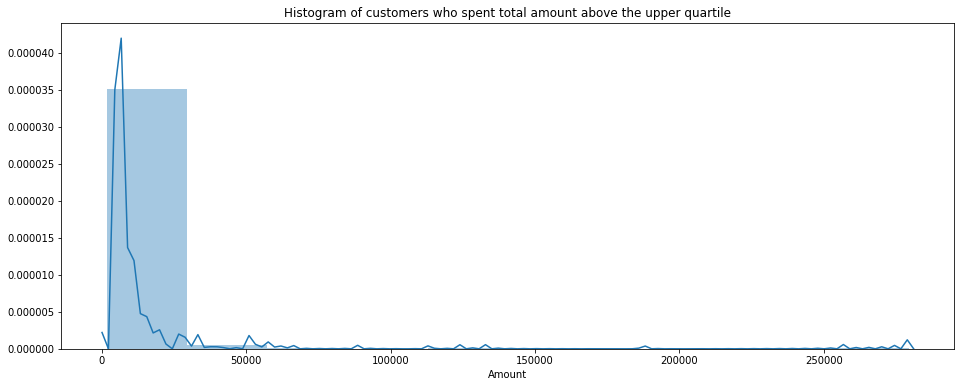

In [17]:
plt.figure(figsize=(16, 6))

sns.distplot(df_customer_by_amount['Amount'].loc[df_customer_by_amount['Amount']>1.625740e+03],bins=10)
plt.title("Histogram of customers who spent total amount above the upper quartile")

In [18]:
Number_of_Customers_total_amount_above_10000=len(df_customer_by_amount[df_customer_by_amount['Amount']>=10000])
Number_of_Customers_total_amount_above_10000

97

In [19]:
Percentage_of_Customers_total_amount_above_10000=Number_of_Customers_total_amount_above_10000/Total_customers_wo_neg_values*100
Percentage_of_Customers_total_amount_above_10000

2.244331328088848

In [20]:
Total_amount_wo_neg_values_Above_10000=np.sum(df_customer_by_amount['Amount'].where(df_customer_by_amount['Amount']>=10000))
Total_amount_wo_neg_values_Above_10000

3155193.9899999998

In [21]:
Percentage_share_of_amount_Above_10000=Total_amount_wo_neg_values_Above_10000*100/Total_amount_wo_neg_values
Percentage_share_of_amount_Above_10000

37.9535912951321

#### 2.25% of customers spent above 10000 and they contributed to 37.95% of the total purchase.

Text(0.5, 1.0, 'Histogram of customers who spent total amount below 10000')

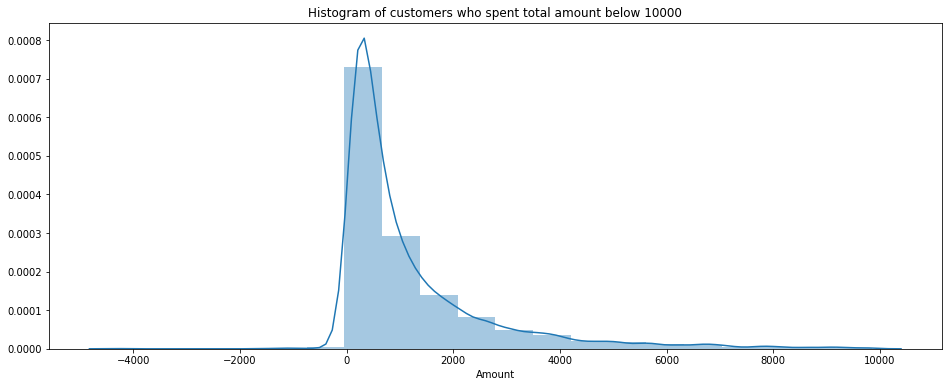

In [22]:
plt.figure(figsize=(16, 6))
sns.distplot(df_customer_by_amount['Amount'].loc[ (df_customer_by_amount['Amount']<10000)] ,bins=20)

plt.title("Histogram of customers who spent total amount below 10000")

In [23]:
round(Total_customers_wo_neg_values*0.1)

432

In [24]:
df_customer_by_amount['%_of_totalAmount']=df_customer_by_amount['Amount']*100/Total_amount_wo_neg_values

In [25]:
df_customer_by_amount.head()

,CustomerID,Amount,%_of_totalAmount
1703,14646.0,279489.02,3.361952
4233,18102.0,256438.49,3.084679
3758,17450.0,187482.17,2.255209
1895,14911.0,132572.62,1.594706
55,12415.0,123725.45,1.488284


In [26]:
df_customer_only_positive=df_customer_by_amount[df_customer_by_amount['Amount']>0]
df_customer_only_positive.shape

(4322, 3)

In [27]:
df_customer_only_positive.head()

,CustomerID,Amount,%_of_totalAmount
1703,14646.0,279489.02,3.361952
4233,18102.0,256438.49,3.084679
3758,17450.0,187482.17,2.255209
1895,14911.0,132572.62,1.594706
55,12415.0,123725.45,1.488284


In [37]:
df_customer_only_positive.loc[:,'Cumulative%']=df_customer_only_positive['%_of_totalAmount'].cumsum()

In [38]:
df_customer_only_positive.head()

,CustomerID,Amount,%_of_totalAmount,Cumulative%
1703,14646.0,279489.02,3.361952,3.361952
4233,18102.0,256438.49,3.084679,6.446632
3758,17450.0,187482.17,2.255209,8.701841
1895,14911.0,132572.62,1.594706,10.296547
55,12415.0,123725.45,1.488284,11.784831
